In [101]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [102]:
df= pd.read_csv("train_.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [103]:
df.fillna(df.mode().iloc[0], inplace=True)

In [104]:
df = pd.get_dummies(df, drop_first=True)

In [105]:
X = df.drop("Loan_Status_Y", axis=1)  # adjust if target name differs
y = df["Loan_Status_Y"]


In [106]:
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size = 0.2, random_state = 42)

In [107]:
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
)

model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [108]:
y_pred= model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Model Accuracy:" , accuracy * 100, "%")

Model Accuracy: 72.35772357723577 %


In [109]:
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test,y_pred)

In [110]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7235772357723578

Confusion Matrix:
 [[ 9 34]
 [ 0 80]]

Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.21      0.35        43
        True       0.70      1.00      0.82        80

    accuracy                           0.72       123
   macro avg       0.85      0.60      0.59       123
weighted avg       0.81      0.72      0.66       123



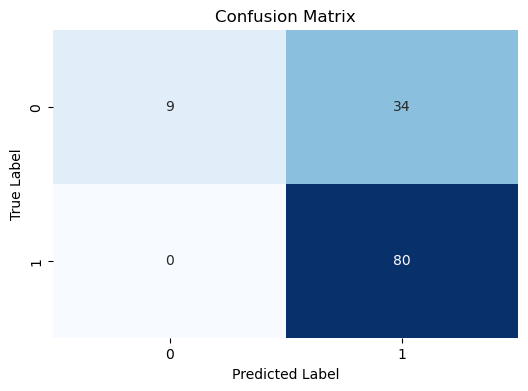

In [111]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

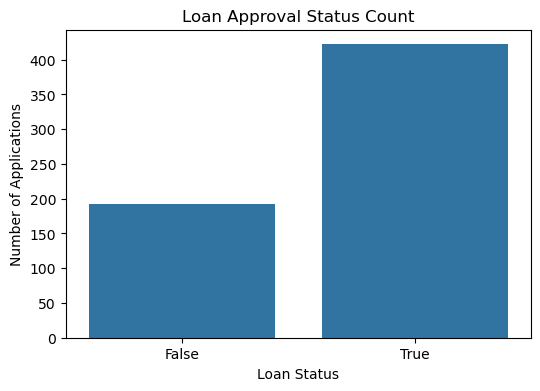

In [122]:
plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    x="Loan_Status_Y"
)

plt.title("Loan Approval Status Count")
plt.xlabel("Loan Status")
plt.ylabel("Number of Applications")
plt.show()